<a href="https://colab.research.google.com/github/MassimilianoCavinato/MachineLearning/blob/master/000_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Import iris dataset (150 rows)
First 10 rows shown**

In [2]:
# IMPORT DATASET AND PRINT FIRST 5
import pandas
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv";
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'];
dataset = pandas.read_csv(url, names=names);
print(dataset.head(5))


   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Dataset Description**

In [3]:
# DESCRIBE DATASET
print(dataset.describe())
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


**Dataset description - Univariate visualization**

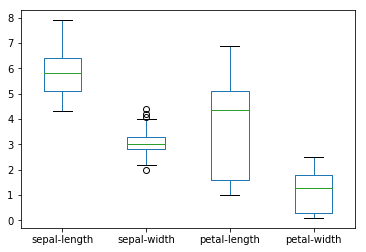

In [4]:
dataset.plot(kind='box')
plt.show()

**Dataset description - Histogram visualization**

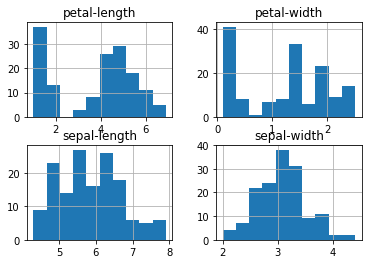

In [5]:
dataset.hist()
plt.show()


**Dataset description - ScatterMatrix visualization**

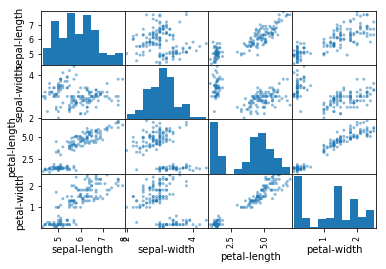

In [6]:
scatter_matrix(dataset)
plt.show()

**Hyper parameters**

In [0]:
test_size = 0.05
seed = 7
scoring = 'accuracy'

**Define X and Y columns  from dataset with proper slice method**

In [0]:
X = dataset.values[:,0:4] #sepal infos
Y = dataset.values[:,4] # setosa, versicolor or virginica?

**Train Test**

In [0]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)


**Make an array of different models to run in a "for" loop**

In [0]:
# models array for looping check
models = [] 
models.append(('Linear Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discrimination Anlaysis', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gausiaan Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

**Loop and cross validate all models in array printing cool stuff to make model comparisons**

Model:Linear Regression
Mean:0.9519047619047619
Std dev:0.060513674172907074

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         2
Iris-versicolor       1.00      0.50      0.67         4
 Iris-virginica       0.50      1.00      0.67         2

       accuracy                           0.75         8
      macro avg       0.83      0.83      0.78         8
   weighted avg       0.88      0.75      0.75         8

Confusion Matrix


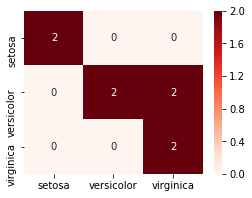

----------------------------------------------------------------------
Model:Linear Discrimination Anlaysis
Mean:0.9790476190476192
Std dev:0.03202889851580996

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         2
Iris-versicolor       1.00      1.00      1.00         4
 Iris-virginica       1.00      1.00      1.00         2

       accuracy                           1.00         8
      macro avg       1.00      1.00      1.00         8
   weighted avg       1.00      1.00      1.00         8

Confusion Matrix


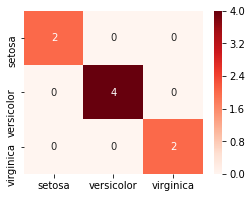

----------------------------------------------------------------------
Model:K Nearest Neighbors
Mean:0.9519047619047619
Std dev:0.05265943289683124

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         2
Iris-versicolor       0.80      1.00      0.89         4
 Iris-virginica       1.00      0.50      0.67         2

       accuracy                           0.88         8
      macro avg       0.93      0.83      0.85         8
   weighted avg       0.90      0.88      0.86         8

Confusion Matrix


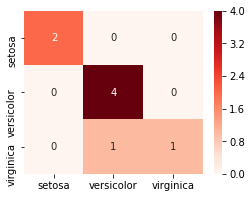

----------------------------------------------------------------------
Model:Decision Tree
Mean:0.9523809523809523
Std dev:0.06730982279651282

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         2
Iris-versicolor       0.80      1.00      0.89         4
 Iris-virginica       1.00      0.50      0.67         2

       accuracy                           0.88         8
      macro avg       0.93      0.83      0.85         8
   weighted avg       0.90      0.88      0.86         8

Confusion Matrix


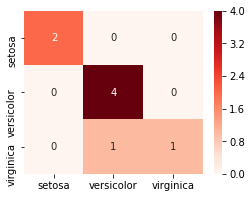

----------------------------------------------------------------------
Model:Gausiaan Naive Bayes
Mean:0.9657142857142856
Std dev:0.045465593380114314

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         2
Iris-versicolor       0.75      0.75      0.75         4
 Iris-virginica       0.50      0.50      0.50         2

       accuracy                           0.75         8
      macro avg       0.75      0.75      0.75         8
   weighted avg       0.75      0.75      0.75         8

Confusion Matrix


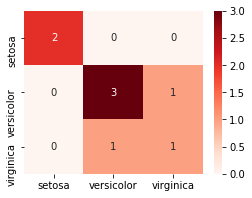

----------------------------------------------------------------------
Model:SVM
Mean:0.9661904761904762
Std dev:0.05406177704220839

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         2
Iris-versicolor       1.00      1.00      1.00         4
 Iris-virginica       1.00      1.00      1.00         2

       accuracy                           1.00         8
      macro avg       1.00      1.00      1.00         8
   weighted avg       1.00      1.00      1.00         8

Confusion Matrix


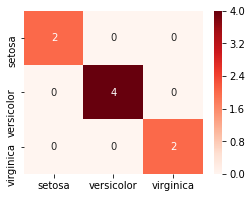

----------------------------------------------------------------------


In [11]:
classes = ["setosa", "versicolor", "virginica"]
# small method to print the model relevant results nicely
def print_model_report(classes, name, mean, std, conf_matrix, class_report):
  print('\033[1m\033[36m' + "Model:{}".format(name)+'\033[0m') #bold and blue
  print("Mean:{}".format(mean))
  print("Std dev:{}".format(std))
  print()
  print(class_report)
  print("Confusion Matrix")
  df_cm = pd.DataFrame(conf_matrix, index = [cl for cl in classes], columns = [cl for cl in classes])
  plt.figure(figsize = (4,3))
  sn.heatmap(df_cm, annot=True,  cmap="Reds")
  plt.show()
  print("----------------------------------------------------------------------")
  
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  model.fit(X_train, Y_train)
  predictions = model.predict(X_validation)
  mean = cv_results.mean()
  std = cv_results.std()
  conf_matrix = confusion_matrix(Y_validation, predictions)
  class_report = classification_report(Y_validation, predictions)

  print_model_report(classes, name, mean, std, conf_matrix, class_report)

  

  